In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_DL/mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [41]:
data_var= data.pivot_table(index="gill-size", columns="class", aggfunc="size")
data_var

class,0,1
gill-size,,
0,3920,1692
1,288,2224


<AxesSubplot:xlabel='class', ylabel='gill-size'>

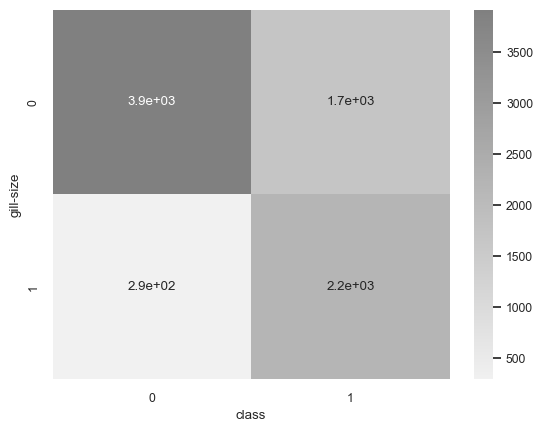

In [42]:
sns.heatmap(data_var, cmap=sns.light_palette("gray", as_cmap=True), annot=True)

In [12]:
X_data = data.drop('class', axis = 1)
y_data = data['class']

In [13]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((6499, 22), (6499,), (1625, 22), (6499,))

In [15]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5199, 22), (5199,), (1300, 22), (1300,))

In [17]:
X_train= X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

In [26]:
#Defining the model 
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential

inputs = Input(shape = (22,))

x = Dense(32,activation='relu')(inputs)
x2 = Dense(32,activation='relu')(x)
x3 = Dense(32, activation = 'relu')(x2)
outputs = Dense(1, activation = 'sigmoid')(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",metrics=["accuracy"]
             )

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                736       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [27]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/100
163/163 [==============================] - 2s 5ms/step - loss: 0.3670 - accuracy: 0.8382 - val_loss: 0.2191 - val_accuracy: 0.9138
Epoch 2/100
163/163 [==============================] - 1s 4ms/step - loss: 0.1847 - accuracy: 0.9300 - val_loss: 0.1651 - val_accuracy: 0.9285
Epoch 3/100
163/163 [==============================] - 1s 4ms/step - loss: 0.1210 - accuracy: 0.9554 - val_loss: 0.0814 - val_accuracy: 0.9762
Epoch 4/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0783 - accuracy: 0.9733 - val_loss: 0.0753 - val_accuracy: 0.9677
Epoch 5/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0341 - val_accuracy: 0.9931
Epoch 6/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0175 - val_accuracy: 0.9954
Epoch 7/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.0143 - val_accuracy: 0.9946

Epoch 56/100
163/163 [==============================] - 1s 4ms/step - loss: 9.2294e-07 - accuracy: 1.0000 - val_loss: 3.6975e-05 - val_accuracy: 1.0000
Epoch 57/100
163/163 [==============================] - 1s 3ms/step - loss: 9.0925e-07 - accuracy: 1.0000 - val_loss: 3.8432e-05 - val_accuracy: 1.0000
Epoch 58/100
163/163 [==============================] - 1s 4ms/step - loss: 8.8242e-07 - accuracy: 1.0000 - val_loss: 2.7486e-05 - val_accuracy: 1.0000
Epoch 59/100
163/163 [==============================] - 1s 3ms/step - loss: 8.5408e-07 - accuracy: 1.0000 - val_loss: 3.0114e-05 - val_accuracy: 1.0000
Epoch 60/100
163/163 [==============================] - 1s 4ms/step - loss: 8.1168e-07 - accuracy: 1.0000 - val_loss: 2.1770e-05 - val_accuracy: 1.0000
Epoch 61/100
163/163 [==============================] - 1s 4ms/step - loss: 8.1177e-07 - accuracy: 1.0000 - val_loss: 2.6611e-05 - val_accuracy: 1.0000
Epoch 62/100
163/163 [==============================] - 1s 3ms/step - loss: 8.4484e-07 -

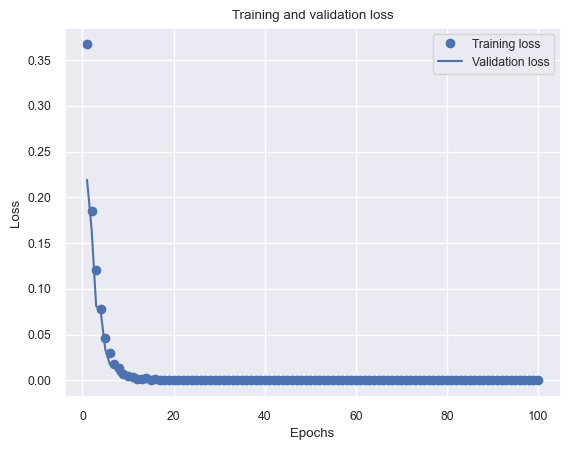

In [29]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [31]:
results = model.evaluate(X_test, y_test)
results

51/51 [==============================] - 0s 3ms/step - loss: 2.7611e-06 - accuracy: 1.0000


[2.7610701636149315e-06, 1.0]